In [1]:
import numpy as np
import matplotlib.pyplot as plt

from impedance.circuits import CustomCircuit
from impedance.plotting import plot_nyquist
from impedance.validation import linKK

In [2]:
circ = 'R1-p(R2,C3)-p(R4,E5)'

vals = [100, 200, 0.8e-6, 500, 0.4e-3, 0.5]

f = np.logspace(7,-6, num=131)

IS1 = CustomCircuit(circ, initial_guess=vals)

Z_IS1 = IS1.predict(f)

Simulating circuit based on initial parameters


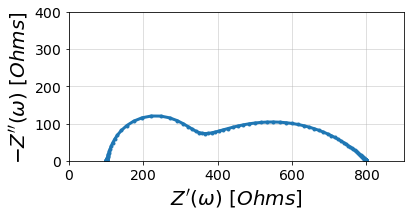

In [26]:
fig, ax = plt.subplots()

plot_nyquist(ax, f, Z_IS1)

ax.set_ylim(0, 400)
ax.set_xlim(0, 900)

plt.show()

In [5]:
sigma_a = 1000
sigma_b = 100
sigma_c = 10000

Z_IS1a = (Z_IS1.real + np.abs(Z_IS1)/sigma_a) + 1j *(Z_IS1.imag + np.abs(Z_IS1)/sigma_a)

Z_IS1b = (Z_IS1.real + np.abs(Z_IS1)/sigma_b) + 1j *(Z_IS1.imag + np.abs(Z_IS1)/sigma_b)

Z_IS1c = (Z_IS1.real + np.abs(Z_IS1)/sigma_c) + 1j *(Z_IS1.imag + np.abs(Z_IS1)/sigma_c)

In [6]:
IS1a_uf = linKK(f, Z_IS1a, c=None, max_M=6)
IS1a_of = linKK(f, Z_IS1a, c=None, max_M=104)

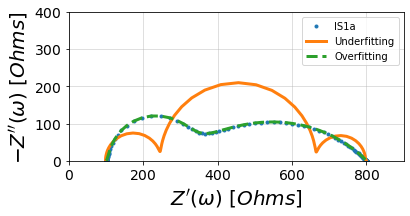

In [29]:
fig, ax =plt.subplots()

plot_nyquist(ax, f, Z_IS1a, fmt='.')
plot_nyquist(ax, f, IS1a_uf[2], fmt='-')
plot_nyquist(ax, f, IS1a_of[2], fmt='--')

ax.set_ylim(0, 400)
ax.set_xlim(0, 900)
ax.legend(labels=('IS1a', 'Underfitting', 'Overfitting'))
fig.savefig('ReplicateFig3a_Stock_linKK.png', dpi=300, bbox_inches='tight')
plt.show()

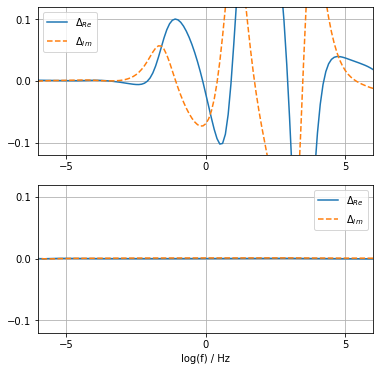

In [28]:
fig, (ax0, ax1) =plt.subplots(nrows=2, figsize=(6,6))

ax0.plot(np.log10(f), IS1a_uf[3], '-', label=r'$\Delta_{Re}$')
ax0.plot(np.log10(f), IS1a_uf[4], '--', label=r'$\Delta_{Im}$')

ax1.plot(np.log10(f), IS1a_of[3], '-', label=r'$\Delta_{Re}$')
ax1.plot(np.log10(f), IS1a_of[4], '--', label=r'$\Delta_{Im}$')

ax0.set_ylim(-.12, .12)
ax1.set_ylim(-.12, .12)
ax0.set_xlim(-6, 6)
ax1.set_xlim(-6, 6)
ax1.set_xlabel('log(f) / Hz')
ax0.locator_params(axis='y', nbins=3, tight=True)
ax1.locator_params(axis='y', nbins=3, tight=True)
ax0.locator_params(axis='x', nbins=3, tight=True)
ax1.locator_params(axis='x', nbins=3, tight=True)
ax0.legend()
ax1.legend()
ax0.grid(True)
ax1.grid(True)

plt.show()

## Trying my version of linKK

In [30]:
from impedance.valid_BG import linKK as linKK2

In [31]:
IS1a_uf2 = linKK2(f, Z_IS1a, c=None, max_M=6)
IS1a_of2 = linKK2(f, Z_IS1a, c=None, max_M=104)

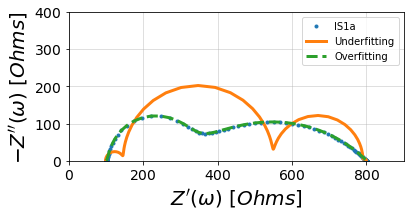

In [32]:
fig, ax =plt.subplots()

plot_nyquist(ax, f, Z_IS1a, fmt='.')
plot_nyquist(ax, f, IS1a_uf2[2], fmt='-')
plot_nyquist(ax, f, IS1a_of2[2], fmt='--')

ax.set_ylim(0, 400)
ax.set_xlim(0, 900)
ax.legend(labels=('IS1a', 'Underfitting', 'Overfitting'))
plt.show()

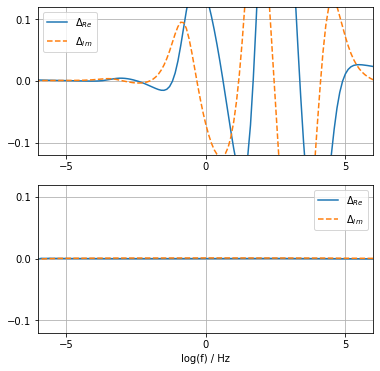

In [33]:
fig, (ax0, ax1) =plt.subplots(nrows=2, figsize=(6,6))

ax0.plot(np.log10(f), IS1a_uf2[3], '-', label=r'$\Delta_{Re}$')
ax0.plot(np.log10(f), IS1a_uf2[4], '--', label=r'$\Delta_{Im}$')

ax1.plot(np.log10(f), IS1a_of2[3], '-', label=r'$\Delta_{Re}$')
ax1.plot(np.log10(f), IS1a_of2[4], '--', label=r'$\Delta_{Im}$')

ax0.set_ylim(-.12, .12)
ax1.set_ylim(-.12, .12)
ax0.set_xlim(-6, 6)
ax1.set_xlim(-6, 6)
ax1.set_xlabel('log(f) / Hz')
ax0.locator_params(axis='y', nbins=3, tight=True)
ax1.locator_params(axis='y', nbins=3, tight=True)
ax0.locator_params(axis='x', nbins=3, tight=True)
ax1.locator_params(axis='x', nbins=3, tight=True)
ax0.legend()
ax1.legend()
ax0.grid(True)
ax1.grid(True)

plt.show()

In [13]:
# Number of decades in frequency range
N_decade = np.log10(f[0]) - np.log10(f[-1])

In [134]:
# Use linKK to get imaginary chi-squared for using a number of RC-elements
# ranging from 1 element to 12 per frequency decade.
# Note: This takes a LONG time to evaluate, skip to loading in results.

M_range = np.arange(1, int(np.ceil(12 * N_decade)))
Chi_Im = []
mus = []
Z_linKKs = []

for M in M_range:
    M, mu, Z_linKK, res_real, res_imag = linKK(f, Z_IS1a, c=None, max_M=M)
    Chi_Im.append(1 / len(res_imag) * (np.sum(res_imag)) **2)
    mus.append(mu)
    Z_linKKs.append(Z_linKK)

mus = np.array(mus)
Z_linKKs = np.array(Z_linKKs)

In [17]:
# Uses the modified linKK to get imaginary chi-squared for using a number of RC-elements
# ranging from 1 element to 12 per frequency decade.
# Note: This takes a LONG time to evaluate, skip to loading in results.

M_range = np.arange(1, int(np.ceil(4 * N_decade)))
Chi_Im2 = []
mus2 = []
Z_linKKs2 = []

for M in M_range:
    M, mu, Z_linKK, res_real, res_imag = linKK2(f, Z_IS1a, c=None, max_M=M)
    Chi_Im2.append(1 / len(res_imag) * (np.sum(res_imag)) **2)
    mus2.append(mu)
    Z_linKKs2.append(Z_linKK)

mus2 = np.array(mus2)
Z_linKKs2 = np.array(Z_linKKs2)

In [163]:
# Saving simulation results so others can load in the data.

np.save('Chi_sq_Imag', Chi_Im)
np.save('Chi_sq2_Imag', Chi_Im2)
np.save('Z_linKK_fig5', Z_linKKs)
np.save('Z_linKK2_fig5', Z_linKKs2)
np.save('Mus_fig6', mus)
np.save('Mus2_fig6', mus2)
np.save('M_values', M_range)

In [14]:
# Loading in results from fitting above

Chi_Im = np.load('Chi_sq_Imag.npy')
Chi_Im2 = np.load('Chi_sq2_Imag.npy')
Z_linKKs = np.load('Z_linKK_fig5.npy')
Z_linKKs2 = np.load('Z_linKK2_fig5.npy')
mus = np.load('Mus_fig6.npy')
mus2 = np.load('Mus2_fig6.npy')
M_range = np.load('M_values.npy')

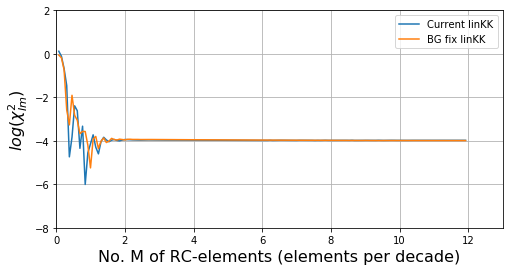

In [15]:
# Reproducing Figure 5

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(M_range/N_decade, np.log10(Chi_Im))
ax.plot(M_range/N_decade, np.log10(Chi_Im2))

ax.set_ylabel('$log(\chi^2_{Im})$', fontsize=16)
ax.set_xlabel('No. M of RC-elements (elements per decade)', fontsize=16)
ax.legend(labels=('Current linKK', 'BG fix linKK'))
ax.set_ylim(-8, 2)
ax.set_xlim(0,13)
ax.locator_params(axis='y', nbins=6, tight=True)
plt.grid(True)

plt.show()

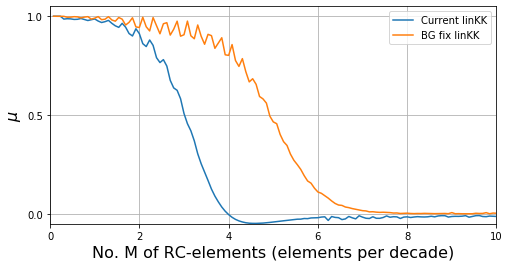

In [16]:
# Reproducing Figure 6

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(M_range/N_decade, mus)
ax.plot(M_range/N_decade, mus2)

ax.set_ylabel('$\mu$', fontsize=16)
ax.set_xlabel('No. M of RC-elements (elements per decade)', fontsize=16)
ax.legend(labels=('Current linKK', 'BG fix linKK'))
ax.set_ylim(-.05, 1.05)
ax.set_xlim(0,10)
ax.locator_params(axis='y', nbins=3, tight=True)
plt.grid(True)

plt.show()

## Neither current version nor BG fix replicates these figures. Perhaps
## this results from the paper just fitting the real parts, whereas
## impedance.py fits both real and imaginary parts.